In [12]:
import sys
import os
sys.path.append(os.path.abspath('../'))

import numpy as np
from random import randint
import random
from scipy.stats import entropy

from ortc.utils import *
from ortc.glop_v2 import glop_v2
from ortc.ortc_v2 import ortc_v2
from ortc.ortc_v1 import ortc_v1
from otc.exactOTC import exact_otc
from ortc.entropicORTC import entropic_ortc
from ortc.entropicORTC_log import entropic_ortc_log

In [5]:
n = 15

In [3]:
def independent_weight_couplings(A1, A2):
    dx = A1.shape[0]
    dy = A2.shape[0]
    w = np.zeros((dx,dy,dx,dy))
    for i in range(dx):
        for j in range(dy):
            for k in range(dx):
                w[i,j,k,:] = A1[i,k]*A2[j,:]
    return w

In [8]:
A1 = stochastic_block_model([n], np.array([[1.0]]))

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

ortc_cost_list = []
entropic_ortc_cost_list = []
independent_cost_list = []
kl_divergence = []
# Find all the edges in the upper triangular part of the matrix (since it's symmetric)
edges1 = [(i, j) for i in range(n) for j in range(i+1, n) if A1[i, j] > 0]
edges2 = [(i, j) for i in range(n) for j in range(i+1, n) if A2[i, j] > 0]

# Run algorithm
for i in range(2):
    print(i)
    # Ensure each graph has a total degree of 1
    A1 /= np.sum(A1)
    A2 /= np.sum(A2)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    _, cost, weight = glop_v2(A1, A2, c, vertex=True)
    d_ortc = np.sum(weight, axis=(2, 3))
    ortc_cost_list.append(cost)
    
    _, entropic_cost, _, _, _ = entropic_ortc(A1, A2, c, 0.0001, 10000, 1e-10)
    entropic_ortc_cost_list.append(entropic_cost)
    
    kl_divergence.append(entropy(d.flatten(), d_ortc.flatten()))
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1


In [25]:
independent_cost_list

[0.0,
 5.056166789940825e-06,
 8.893755349636035e-06,
 1.9654811438714075e-05,
 2.899037454218539e-05,
 3.439500000000008e-05,
 4.811075573799227e-05,
 4.86085729585463e-05,
 6.620408449945502e-05,
 6.36253827883872e-05]

In [27]:
independent_cost_list

[0.0, 5.056166789940821e-06]

In [28]:
ortc_cost_list

[0.0, 1.4960394068922823e-17]

In [29]:
# Run algorithm
for i in range(2):
    print(i)
    # Ensure each graph has a total degree of 1
    A1 /= np.sum(A1)
    A2 /= np.sum(A2)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    _, cost, _ = glop_v2(A1, A2, c, vertex=True)
    ortc_cost_list.append(cost)
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1


In [30]:
independent_cost_list

[0.0, 5.056166789940821e-06, 8.89375534963604e-06, 1.1349441058735717e-05]

In [31]:
ortc_cost_list

[0.0, 1.4960394068922823e-17, 3.765492818437509e-17, 3.2001477148280136e-17]

In [18]:
A1 = stochastic_block_model([n], np.array([[1.0]]))

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

ortc_cost_list = []
independent_cost_list = []

# Find all the edges in the upper triangular part of the matrix (since it's symmetric)
edges1 = [(i, j) for i in range(n) for j in range(i+1, n) if A1[i, j] == 1]
edges2 = [(i, j) for i in range(n) for j in range(i+1, n) if A2[i, j] == 1]

# Ensure each graph has a total degree of 1
A1 /= np.sum(A1)
A2 /= np.sum(A2)

# Run algorithm
for i in range(10):
    print(i)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    # _, cost, _ = glop_v2(A1, A2, c, vertex=True)
    # ortc_cost_list.append(cost)
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

0
1
2
3
4
5
6
7
8
9


In [19]:
independent_cost_list

[0.0,
 4.866285138393977e-06,
 1.0672507854237676e-05,
 1.5039001239195584e-05,
 2.2328145165851653e-05,
 2.640052241607146e-05,
 2.8479902921107944e-05,
 3.688586545729399e-05,
 3.690437626297681e-05,
 3.756459499899729e-05]

In [15]:
independent_cost_list

[0.0, 4.866285138393976e-06]

In [15]:
n = 7
A1 = stochastic_block_model([n], np.array([[1.0]]))

# Random permutation
perm = np.random.permutation(n)
A2 = A1[np.ix_(perm, perm)]

ortc_cost_list = []
entropic_ortc_cost_list = []
independent_cost_list = []
kl_divergence = []
# Find all the edges in the upper triangular part of the matrix (since it's symmetric)
edges1 = [(i, j) for i in range(n) for j in range(i+1, n) if A1[i, j] > 0]
edges2 = [(i, j) for i in range(n) for j in range(i+1, n) if A2[i, j] > 0]

# Run algorithm
for i in range(20):
    print(i)
    # Ensure each graph has a total degree of 1
    A1 /= np.sum(A1)
    A2 /= np.sum(A2)
    # Get cost function
    w_indep = independent_weight_couplings(A1,A2)
    c = get_degree_cost(A1, A2)
    d = np.sum(w_indep, axis=(2, 3))
    cost_indep = np.sum(d * c)
    independent_cost_list.append(cost_indep)
    _, cost, weight = glop_v2(A1, A2, c, vertex=True)
    d_ortc = np.sum(weight, axis=(2, 3))
    ortc_cost_list.append(cost)
    
    _, entropic_cost, _, _, _ = entropic_ortc_log(A1, A2, c, 0.0001, 10000, 1e-10)
    entropic_ortc_cost_list.append(entropic_cost)
    
    kl_divergence.append(entropy(d.flatten(), d_ortc.flatten()))
    
    edge_to_remove1 = random.choice(edges1)
    i, j = edge_to_remove1
    A1[i, j] = 0
    A1[j, i] = 0
    
    edge_to_remove2 = random.choice(edges2)
    i, j = edge_to_remove2
    A2[i, j] = 0
    A2[j, i] = 0

print(ortc_cost_list)
print(entropic_ortc_cost_list)
print(independent_cost_list)
print(kl_divergence)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[0.0, 1.1928228109655543e-19, 6.068112973390006e-19, 8.01734174309621e-18, 0.001211905049088694, 0.000989594431387388, 0.0022354125976562513, 0.0022285156250000347, 0.002325925925925929, 5.678567966453292e-18, 0.004744231644550262, 0.004744231644550262, 0.003713348765432102, 0.004439587459873082, 0.004439587459873083, 0.004836589030803908, 0.006471201145214009, 0.004554687499999999, 0.0053570280349794705, 0.0053570280349794705]
[0.0, 1.0754800046025087e-06, 8.271180667948455e-07, 4.830081435267187e-07, 0.0005159723773710819, 0.0008021451875379125, 0.0012633138195378424, 0.0013505996389666475, 0.0016369991606828703, 6.661920475333567e-06, 0.0034599143118983636, 0.0034599143118981867, 0.0037777203779736164, 0.004000270846919855, 0.00400027084691983, 0.00441802776369536, 0.005696662177599074, 0.004150377607911489, 0.004923004365478414, 0.004923004365478414]
[0.0, 0.00023437499999999988, 0.0006368889127615655, 0.0009954656302392938, 0.00121

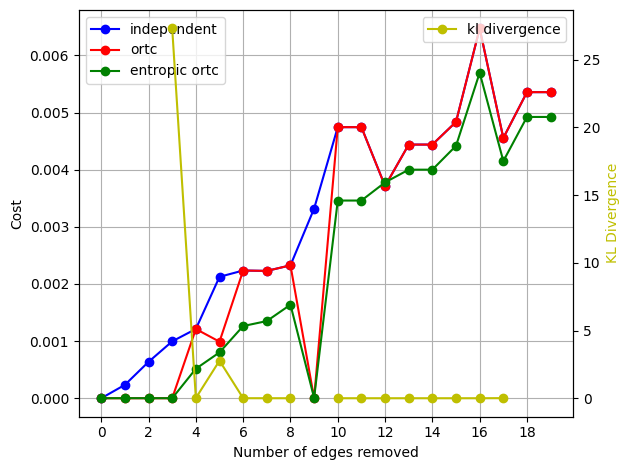

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plotting independent, ortc, and entropic ortc costs on the primary y-axis
ax1.plot(independent_cost_list, marker='o', linestyle='-', color='b', label='independent')
ax1.plot(ortc_cost_list, marker='o', linestyle='-', color='r', label='ortc')
ax1.plot(entropic_ortc_cost_list, marker='o', linestyle='-', color='g', label='entropic ortc')

# Label for primary y-axis
ax1.set_xlabel('Number of edges removed')
ax1.set_ylabel('Cost', color='black')

# Set xticks
ax1.set_xticks(np.arange(0, 21, 2))

# Add grid and legend for the first axis
ax1.grid(True)
ax1.legend(loc='upper left')

# Create a secondary y-axis for the KL divergence
ax2 = ax1.twinx()

# Plotting kl_divergence on the secondary y-axis
ax2.plot(kl_divergence, marker='o', linestyle='-', color='y', label='kl divergence')

# Label for secondary y-axis
ax2.set_ylabel('KL Divergence', color='y')

# Add legend for the second axis
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()